In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the Excel file and the 'tidy' sheet
file_path = 'SAT7HL.xlsx'  # Update this with your actual file path
xls = pd.ExcelFile(file_path)
sheet_name = 'tidy'
df = pd.read_excel(xls, sheet_name=sheet_name)

# Filter the data to only focus on 'CR' for the analysis
df_anova = df[['Animal_ID', 'Phenotype', 'Block_Number', 'CR']].dropna()

# Convert the categorical variables to appropriate types
df_anova['Block_Number'] = df_anova['Block_Number'].astype('category')
df_anova['Phenotype'] = df_anova['Phenotype'].astype('category')

# Fit a linear mixed-effects model with 'Block_Number' as a repeated measure and 'Phenotype' as a fixed effect
# Random intercept for each 'Animal_ID'

# Create the linear mixed model formula
formula = "CR ~ Block_Number * Phenotype"

# Fit the model
model = mixedlm(formula, df_anova, groups=df_anova['Animal_ID'])
mixed_model = model.fit()

# Summarize the results
print(mixed_model.summary())


                     Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         CR       
No. Observations:          210             Method:                     REML     
No. Groups:                42              Scale:                      4.0189   
Min. group size:           5               Log-Likelihood:             -444.7486
Max. group size:           5               Converged:                  Yes      
Mean group size:           5.0                                                  
--------------------------------------------------------------------------------
                                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------
Intercept                             16.250    0.775 20.969 0.000 14.731 17.769
Block_Number[T.Bloc2]                  1.750    1.002  1.746 0.081 -0.215  3.715
Block_Number[T.Bloc3]                  2.000    1.

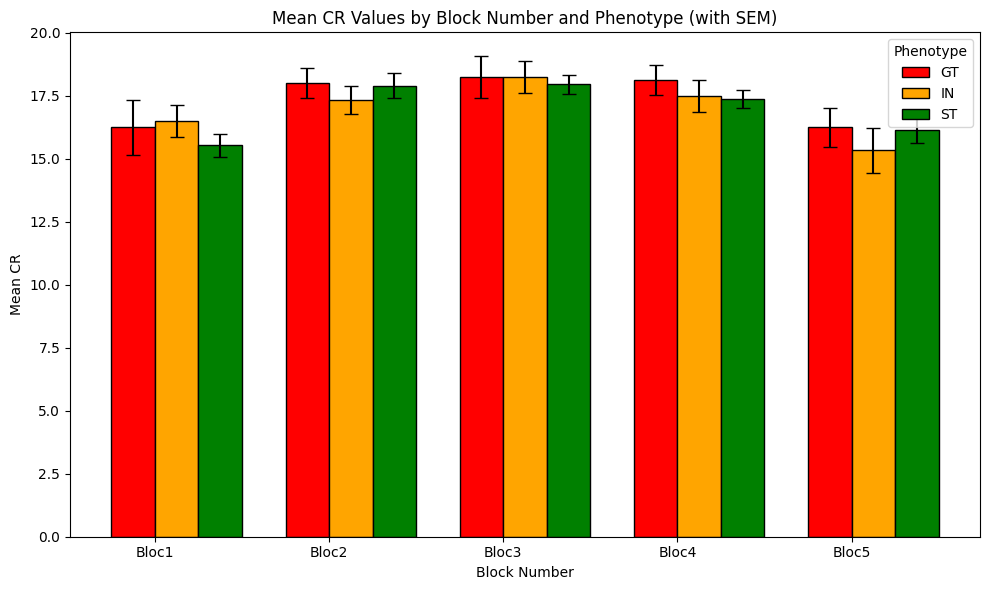

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create the bar chart with grouped bars instead of overlaid bars
# Define the width for each bar
sem_df = df_anova.groupby(['Block_Number', 'Phenotype']).agg(
    mean_CR=('CR', 'mean'),
    sem_CR=('CR', lambda x: x.std() / (len(x)**0.5))
).reset_index()

# Define the colors for each phenotype
color_map = {'ST': 'green', 'GT': 'red', 'IN': 'orange'}

bar_width = 0.25

# Get the unique block numbers and the positions for the bars
block_numbers = sem_df['Block_Number'].unique()
block_pos = np.arange(len(block_numbers))

# Plot each phenotype group side by side with their respective error bars
fig, ax = plt.subplots(figsize=(10, 6))

for i, phenotype in enumerate(sem_df['Phenotype'].unique()):
    phenotype_data = sem_df[sem_df['Phenotype'] == phenotype]
    ax.bar(
        block_pos + i * bar_width,
        phenotype_data['mean_CR'],
        yerr=phenotype_data['sem_CR'],
        width=bar_width,
        label=phenotype,
        color=color_map[phenotype],
        capsize=5,
        edgecolor='black'
    )

# Customize the plot
ax.set_title('Mean CR Values by Block Number and Phenotype (with SEM)')
ax.set_xlabel('Block Number')
ax.set_ylabel('Mean CR')
ax.set_xticks(block_pos + bar_width / 2)
ax.set_xticklabels(block_numbers)
ax.legend(title='Phenotype')
plt.tight_layout()

# Show the plot
plt.show()


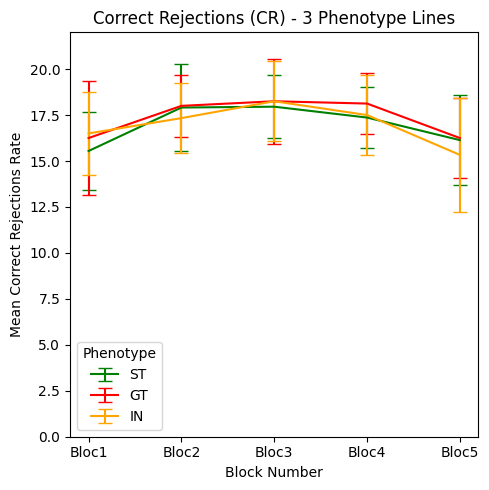

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the spreadsheet
file_path = 'SAT7HL.xlsx'
xls = pd.ExcelFile(file_path)

# Load the data from the 'tidy' sheet
tidy_df = pd.read_excel(xls, sheet_name='tidy')

# Filter out NaN in 'CR' as we are focusing on that metric
tidy_filtered_cr = tidy_df.dropna(subset=['CR'])

# Get unique phenotypes
phenotypes = tidy_filtered_cr['Phenotype'].unique()

# Define colors for phenotypes
phenotype_colors = {'ST': 'green', 'IN': 'orange', 'GT': 'red'}

# Group by Block_Number and Phenotype, then calculate mean and std for CR
grouped_data_cr = tidy_filtered_cr.groupby(['Block_Number', 'Phenotype']).agg(
    mean_cr=('CR', 'mean'),
    std_cr=('CR', 'std')
).reset_index()

# Set the figure for a single plot for 'CR'
plt.figure(figsize=(5, 5))

# Plot each phenotype for CR
for phenotype in phenotypes:
    data = grouped_data_cr[grouped_data_cr['Phenotype'] == phenotype]
    plt.errorbar(data['Block_Number'], data['mean_cr'], yerr=data['std_cr'], 
                 label=phenotype, color=phenotype_colors[phenotype], capsize=5)

plt.title('Correct Rejections (CR) - 3 Phenotype Lines')
plt.xlabel('Block Number')
plt.ylabel('Mean Correct Rejections Rate')
plt.legend(title='Phenotype')
plt.ylim(0, 22)

plt.tight_layout()
plt.show()
